In [2]:
# For File Handling
import csv
import os

# For Data
import pandas as pd
import numpy as np

# For Processing
import re
import nltk
import string

# For Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For Word Embeddings
import gensim
import gensim.downloader as gensim_api

# For Deep Learning
import tensorflow as tf
from tensorflow.keras import Model, models, layers, preprocessing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Bert language model
import transformers

# For Model Visualisation
import keras
import pydotplus
import pydot
import graphviz
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

# Miscellaneous 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Since tensorflow gpu is being used
try:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except:
    pass

In [4]:
train_df= pd.read_json("/Users/saineymanga/Desktop/snli_1.0/snli_1.0_train.jsonl", lines=True )
val_df= pd.read_json("/Users/saineymanga/Desktop/snli_1.0/snli_1.0_dev.jsonl", lines=True )
test_df=  pd.read_json("/Users/saineymanga/Desktop/snli_1.0/snli_1.0_test.jsonl", lines=True )

In [5]:
train_df = train_df[train_df['gold_label'] != "-"]
val_df= val_df[val_df['gold_label'] != "-"]
test_df= test_df[test_df['gold_label'] != "-"]

In [79]:
train_df.shape

(549367, 10)

In [6]:
tr_df = train_df[["sentence1","sentence2","gold_label"]]
tr_df.head(10)

,sentence1,sentence2,gold_label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,Children smiling and waving at camera,They are smiling at their parents,neutral
4,Children smiling and waving at camera,There are children present,entailment
5,Children smiling and waving at camera,The kids are frowning,contradiction
6,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,contradiction
7,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,entailment
8,A boy is jumping on skateboard in the middle o...,The boy is wearing safety equipment.,neutral
9,An older man sits with his orange juice at a s...,An older man drinks his juice as he waits for ...,neutral


In [7]:
va_df = val_df[["sentence1","sentence2","gold_label"]]
va_df.head(10)

,sentence1,sentence2,gold_label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,neutral
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,entailment
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,contradiction
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,entailment
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,neutral
5,"Two young children in blue jerseys, one with t...",Two kids in jackets walk to school.,contradiction
6,A man selling donuts to a customer during a wo...,A woman drinks her coffee in a small cafe.,contradiction
7,A man selling donuts to a customer during a wo...,A man selling donuts to a customer during a wo...,neutral
8,A man selling donuts to a customer during a wo...,A man selling donuts to a customer.,entailment
9,Two young boys of opposing teams play football...,boys play football,entailment


In [8]:
te_df = test_df[["sentence1","sentence2","gold_label"]]
te_df.head(10)

,sentence1,sentence2,gold_label
0,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,neutral
1,This church choir sings to the masses as they ...,The church is filled with song.,entailment
2,This church choir sings to the masses as they ...,A choir singing at a baseball game.,contradiction
3,"A woman with a green headscarf, blue shirt and...",The woman is young.,neutral
4,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,entailment
5,"A woman with a green headscarf, blue shirt and...",The woman has been shot.,contradiction
6,An old man with a package poses in front of an...,A man poses in front of an ad.,entailment
7,An old man with a package poses in front of an...,A man poses in front of an ad for beer.,neutral
8,An old man with a package poses in front of an...,A man walks by an ad.,contradiction
9,A statue at a museum that no seems to be looki...,The statue is offensive and people are mad tha...,neutral


In [9]:
tr_df.isnull().sum(), tr_df.shape

(sentence1     0
 sentence2     0
 gold_label    0
 dtype: int64,
 (549367, 3))

In [10]:
va_df.isnull().sum(), va_df.shape

(sentence1     0
 sentence2     0
 gold_label    0
 dtype: int64,
 (9842, 3))

In [11]:
te_df.isnull().sum(), te_df.shape

(sentence1     0
 sentence2     0
 gold_label    0
 dtype: int64,
 (9824, 3))

In [12]:
print(tr_df.sentence1[1])
print(tr_df.sentence2[1])
print(tr_df.gold_label[1])

A person on a horse jumps over a broken down airplane.
A person is at a diner, ordering an omelette.
contradiction


In [13]:
print(va_df.sentence1[1])
print(va_df.sentence2[1])
print(va_df.gold_label[1])

Two women are embracing while holding to go packages.
Two woman are holding packages.
entailment


DATA VISULAIZATION

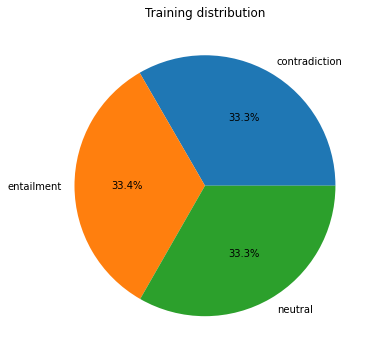

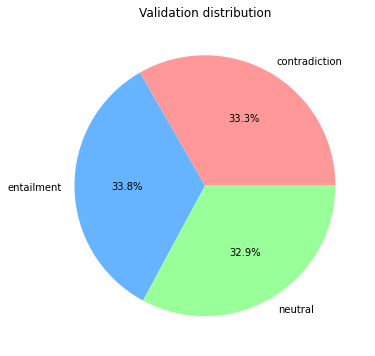

In [82]:
###VISUALIZING THE DISTRIBUTION####
labels, frequencies = np.unique(tr_df.gold_label.values, return_counts = True)

plt.figure(figsize = (8, 6))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title('Training distribution')
plt.show()

label, frequencie = np.unique(va_df.gold_label.values, return_counts = True)
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize = (8,6))
plt.pie(frequencie,labels = label, colors=colors, autopct = '%1.1f%%')
plt.title('Validation distribution')
plt.show()

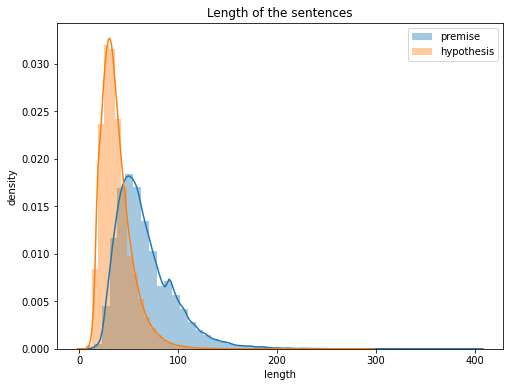

In [15]:
## LENGTH OF SENTENCES
for data in [tr_df, va_df, te_df]:
    data['sent1_length'] = data.loc[:, 'sentence1'].str.len()
    data['sent2_length'] = data.loc[:, 'sentence2'].str.len()

plt.figure(figsize=(8, 6))
sns.distplot(tr_df['sent1_length'], label = 'premise')
sns.distplot(tr_df['sent2_length'], label = 'hypothesis')
plt.title('Length of the sentences')
plt.xlabel('length')
plt.ylabel('density')
plt.legend()

In [16]:
## AVERAGE LENGTH OF SENTENCE UNDER EACH LABEL
gps = tr_df.groupby(['gold_label'])
for i in gps.groups.keys():
    print('-' * 50)
    group = gps.get_group(i)
    print('Average lenth of the premise of class "{}" is {}'.format(i, group['sent1_length'].mean()))
    print('Average lenth of the hypothesis of class "{}" is {}'.format(i, group['sent2_length'].mean()))

--------------------------------------------------
Average lenth of the premise of class "contradiction" is 66.2737257556486
Average lenth of the hypothesis of class "contradiction" is 36.83186033943457
--------------------------------------------------
Average lenth of the premise of class "entailment" is 66.27328041174161
Average lenth of the hypothesis of class "entailment" is 33.510468007153136
--------------------------------------------------
Average lenth of the premise of class "neutral" is 66.27515265588409
Average lenth of the hypothesis of class "neutral" is 42.095275874898775


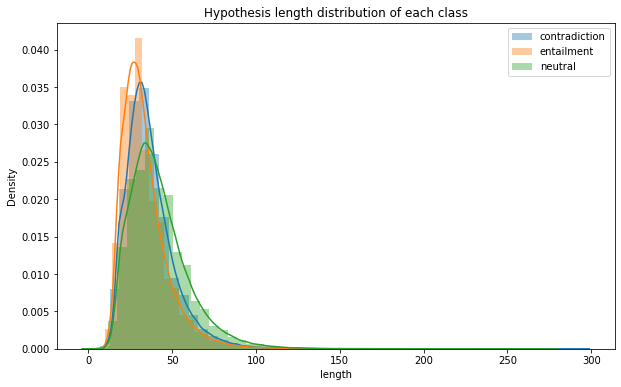

In [17]:
## VIZ FOR THE LENGTH OF HYPOTHESIS UNDER EACH LABEL
plt.figure(figsize=(10, 6))
#gps = train_data.groupby(['label'])
for i in gps.groups.keys():
    group = gps.get_group(i)
    sns.distplot(group['sent2_length'], label = i)
    plt.xlabel('length')
    plt.title('Hypothesis length distribution of each class')
plt.legend()

# DATA PREPROCESSING 

In [18]:
def sanitize_text(text):
    # Remove punctuation and lower case
    sanitized_text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return sanitized_text

tr_df["premise"] = tr_df["sentence1"].apply(lambda x: sanitize_text(x))
tr_df["hypothesis"] = tr_df["sentence2"].apply(lambda x: sanitize_text(x))

va_df["premise"] = va_df["sentence1"].apply(lambda x: sanitize_text(x))
va_df["hypothesis"] = va_df["sentence2"].apply(lambda x: sanitize_text(x))

te_df["premise"] = te_df["sentence1"].apply(lambda x: sanitize_text(x))
te_df["hypothesis"] = te_df["sentence2"].apply(lambda x: sanitize_text(x))

In [19]:
### LABEL ENCODING
label_index = {
    "entailment":0,
    "neutral":1,
    "contradiction":2,
}

def indexify_label(label):
    return label_index[label]

tr_df["label_index"] = tr_df["gold_label"].apply(lambda x: indexify_label(x))
va_df["label_index"] = va_df["gold_label"].apply(lambda x: indexify_label(x))
te_df["label_index"] = te_df["gold_label"].apply(lambda x: indexify_label(x))

In [20]:
# Tokenize text
all_train_text = list(tr_df['premise']) + list(tr_df['hypothesis']) + list(va_df['premise']) + list(va_df['hypothesis'])

tokenizer = preprocessing.text.Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(all_train_text)
word_index = tokenizer.word_index

In [21]:
## CONVERT TEXT TO SEQUENCE
def texts_to_sequences(texts):
    return tokenizer.texts_to_sequences(texts)

train_sequence_dict = dict()
val_sequence_dict = dict()
test_sequence_dict = dict()

# Create Train sequences
train_sequence_dict['premise'] = texts_to_sequences(tr_df['premise'])
train_sequence_dict['hypothesis'] = texts_to_sequences(tr_df['hypothesis'])

# Create Val sequences
val_sequence_dict['premise'] = texts_to_sequences(va_df['premise'])
val_sequence_dict['hypothesis'] = texts_to_sequences(va_df['hypothesis'])

# Create test sequences
test_sequence_dict['premise'] = texts_to_sequences(te_df['premise'])
test_sequence_dict['hypothesis'] = texts_to_sequences(te_df['hypothesis'])

In [22]:
### PAD THE CREATED SUQUENCE
max_sequence_len = 50
def pad_sequences(sequences, maxlen):
    '''
        padding="post": add zeros at the end of the sequence to make the samples in the same size.
        maxlen=max_sequence_len: this input defines the maximum number of words in sequences.
        truncating="post" when a sentence exceeds the number of maximum words, drop the last words in the sentence.
    '''
    return preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen, padding="post", truncating="post")

# Pad Train Sequences
train_sequence_dict['premise_padded'] = pad_sequences(train_sequence_dict['premise'], maxlen=max_sequence_len)
train_sequence_dict['hypothesis_padded'] = pad_sequences(train_sequence_dict['hypothesis'], maxlen=max_sequence_len)

# Pad Val Sequences
val_sequence_dict['premise_padded'] = pad_sequences(val_sequence_dict['premise'], maxlen=max_sequence_len)
val_sequence_dict['hypothesis_padded'] = pad_sequences(val_sequence_dict['hypothesis'], maxlen=max_sequence_len)

# Pad test Sequences
test_sequence_dict['premise_padded'] = pad_sequences(test_sequence_dict['premise'], maxlen=max_sequence_len)
test_sequence_dict['hypothesis_padded'] = pad_sequences(test_sequence_dict['hypothesis'], maxlen=max_sequence_len)

In [23]:
embedding_model = gensim_api.load("word2vec-google-news-300")

In [24]:
vector_size = 300

# Length of vocabulary is added a 1 to account for the OOV token
len_vocab = len(word_index)+1

# Create embedding matrix (length of vocabulary x vector size)
embeddings = np.zeros((len_vocab, vector_size))

for word,idx in word_index.items():
    # Update embeddings with pre-trained vectors if word exists
    try:
        embeddings[idx] = embedding_model[word]
        
    # If word does not exist, skip
    except:
        pass

In [25]:
# Function to return an embedding layer
def embedding_layer(name, embeddings, num_nodes=16):
    return models.Sequential(
        [
            # Embedding Layer
            layers.Embedding(
                embeddings.shape[0],
                embeddings.shape[1],
                input_length=max_sequence_len,
                weights=[embeddings],
                trainable=False,
            ),
        ], name=name)


# Function to return a feed-forward layer
def feed_forward_layer(name, num_nodes=200, activation="relu", dropout_rate=0):
    return models.Sequential(
        [
            layers.Dense(num_nodes, activation=activation),
            layers.Dropout(dropout_rate),
            layers.Dense(num_nodes, activation=activation),
            layers.Dropout(dropout_rate),
        ], name=name)

# Function to carry out normalisation for soft-alignment
def normalizer(axis):
    def _normalize(vector_similarities):
        exp_weights = K.exp(vector_similarities)
        sum_weights = K.sum(exp_weights, axis=axis, keepdims=True)
        return exp_weights / sum_weights

    return _normalize


# Function to return distance-sensitive bias terms for intra-sentence attention
def distance_terms(input_shape):
    
    time_steps = input_shape[1]
    distance_terms = np.zeros(shape=(time_steps, time_steps))
    for i in range(time_steps):
        for j in range(time_steps):
            distance_terms[i][j] = min(i-j, 10)
    
    #return K.variable(distance_terms)
    return distance_terms
        
    
# Function to carry out normalisation for intra-sentence attention
def intra_normalizer(axis, distance_terms):
    def _normalize(f_i_j):
        exp_weights = K.exp(f_i_j + distance_terms)
        sum_weights = K.sum(exp_weights, axis=axis, keepdims=True)
        return exp_weights / sum_weights

    return _normalize


# Function to sum and return an aggregated vector
def aggregater(x):
    return K.sum(x, axis=1, keepdims=False)


In [26]:
# Function to combine layers together and return the final dam model
def build_dam_model(num_nodes, intra_sentence_attention=False):
    
    # Input Layer
    x1 = layers.Input(shape=(max_sequence_len,), name="Input_x1")
    x2 = layers.Input(shape=(max_sequence_len,), name="Input_x2")
    
    # Embedding Layer
    embedding = embedding_layer("Embedding", embeddings)
    e1 = embedding(x1)
    e2 = embedding(x2)
    
    input_a = e1
    input_b = e2
    
    if intra_sentence_attention:
        # Intra-Sentence Attention
        feedforward_intra = feed_forward_layer("FF_Intra", num_nodes, dropout_rate= 0.1)
        intra_a_i = feedforward_intra(e1)
        intra_a_j = feedforward_intra(e2)

        f_i_j = layers.dot([intra_a_i, layers.Permute((2,1))(intra_a_j)], axes=(2,1), name="Intra-Attention")

        # -> Distance Sensitive bias terms
        d_i_j = distance_terms(e1.shape)

        # -> Self-Aligned Phrases
        norm_i = layers.Lambda(intra_normalizer(1, d_i_j), name="Normalise_Similarities_i")(f_i_j)
        norm_j = layers.Lambda(intra_normalizer(2, d_i_j), name="Normalise_Similarities_j")(f_i_j)
        self_aligned_ai = layers.dot([norm_i, e1], axes=1, name="Self-Align_a_i")
        self_aligned_bi = layers.dot([norm_j, e2], axes=1, name="Self-Align_b_i")

        input_a = layers.concatenate([e1, self_aligned_ai], name="Concat_embedding_and_self-aligned_a")
        input_b = layers.concatenate([e2, self_aligned_bi], name="Concat_embedding_and_self-aligned_b")
        
    # Attend
    # -> Pass each word through a FFN with RelU activations to yield a non-linear transformation.
    feedforward_F = feed_forward_layer("FF_F", num_nodes, dropout_rate= 0.1)
    x1_nonlinear = feedforward_F(input_a)
    x2_nonlinear = feedforward_F(input_b)
    
    # -> Compute pairwise word similarity between every word in x1 compared to every word in x2, and vice versa.
    vector_similarities = layers.dot([x1_nonlinear, layers.Permute((2,1))(x2_nonlinear)], axes=(2,1), name="Pairwise_Similarity")
    
    # -> Compute Soft-Attention
    norm_similarities_x1 = layers.Lambda(normalizer(1), name="Normalise_Similarities_x1")(vector_similarities)
    norm_similarities_x2 = layers.Lambda(normalizer(2), name="Normalise_Similarities_x2")(vector_similarities)
    alpha = layers.dot([norm_similarities_x2, e1], axes=1, name="Alpha")
    beta = layers.dot([norm_similarities_x1, e2], axes=1, name="Beta")
        
    # Compare
    feedforward_G = feed_forward_layer("FF_G", num_nodes, dropout_rate= 0.1)
    comp1 = layers.concatenate([e1, beta], name="Concat_x1_beta")
    comp2 = layers.concatenate([e2, alpha], name="Concat_x2_alpha")
    
    v1 = feedforward_G(comp1)
    v2 = feedforward_G(comp2)
    
    # Aggregate
    v1_sum = layers.Lambda(aggregater, name="Aggregate_v1")(v1)
    v2_sum = layers.Lambda(aggregater, name="Aggregate_v2")(v2)
    concat = layers.concatenate([v1_sum, v2_sum], name="Concat_v1_v2")
    
    # Output Layer
    feedforward_H = feed_forward_layer("FF_H", num_nodes, dropout_rate= 0.1)
    y = feedforward_H(concat)
    y = layers.Dense(3, activation="softmax", name="Output")(y)
        
    model = Model(inputs=[x1, x2], outputs=y)
    
    model.compile(
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
        optimizer=Adam(lr=0.0005),
    )

    return model

In [27]:
dam_model = build_dam_model(200)
dam_model.summary()

2022-01-21 17:56:38.885695: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_x1 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 Input_x2 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 Embedding (Sequential)         (None, 50, 300)      10873200    ['Input_x1[0][0]',               
                                                                  'Input_x2[0][0]']               
                                                                                                  
 FF_F (Sequential)              (None, 50, 200)      100400      ['Embedding[0][0]',          

In [28]:
# Model Training Inputs
t_1 = train_sequence_dict['premise_padded']
t_2 = train_sequence_dict['hypothesis_padded']
t_y = tr_df['label_index']

# Model Validation Inputs
v_1 = val_sequence_dict['premise_padded']
v_2 = val_sequence_dict['hypothesis_padded']
v_y = va_df['label_index']

In [29]:
# Optimiser information
dam_model.optimizer.get_config()


{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [42]:
# Train DAM model
trained_dam_model = dam_model.fit(
    [t_1, t_2], t_y,
    validation_data=([v_1, v_2], v_y),
    batch_size=512,
    epochs=20,
)

Epoch 1/20
1073/1073 [==============================] - 1539s 1s/step - loss: 0.6755 - accuracy: 0.7141 - val_loss: 0.5325 - val_accuracy: 0.7876
Epoch 2/20
1073/1073 [==============================] - 1491s 1s/step - loss: 0.5502 - accuracy: 0.7810 - val_loss: 0.4745 - val_accuracy: 0.8131
Epoch 3/20
1073/1073 [==============================] - 1441s 1s/step - loss: 0.5108 - accuracy: 0.7988 - val_loss: 0.4581 - val_accuracy: 0.8201
Epoch 4/20
1073/1073 [==============================] - 1447s 1s/step - loss: 0.4874 - accuracy: 0.8095 - val_loss: 0.4418 - val_accuracy: 0.8249
Epoch 5/20
1073/1073 [==============================] - 1451s 1s/step - loss: 0.4702 - accuracy: 0.8169 - val_loss: 0.4297 - val_accuracy: 0.8315
Epoch 6/20
1073/1073 [==============================] - 1453s 1s/step - loss: 0.4565 - accuracy: 0.8226 - val_loss: 0.4257 - val_accuracy: 0.8319
Epoch 7/20
1073/1073 [==============================] - 1444s 1s/step - loss: 0.4452 - accuracy: 0.8276 - val_loss: 0.4202 -

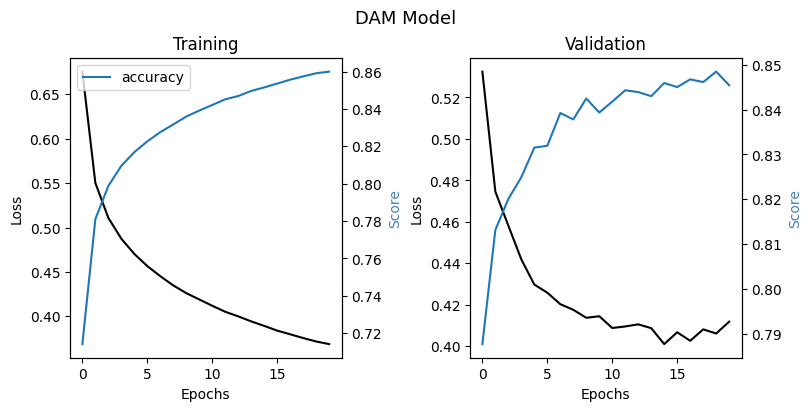

In [51]:
metrics = [k for k in trained_dam_model.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8,4), dpi= 100)
fig.suptitle("DAM Model", fontsize=13)

ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(trained_dam_model.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(trained_dam_model.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(trained_dam_model.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(trained_dam_model.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

# ML MODELS

In [49]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X_train = tr_df[['premise','hypothesis']]
Y_train= tr_df[['label_index']]
X_val =  va_df[['premise','hypothesis']]
Y_val = va_df[['label_index']]

In [52]:
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf_premise= TfidfVectorizer(ngram_range=(1, 3), max_features=100000, min_df=2,
                         token_pattern='\S+')
tf_idf_hypothesis = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3,
                         token_pattern='\S+')
def fn(x):
    if isinstance(x, list): x = x[0]
    return x['premise']

def fn2(x):
    if isinstance(x, list): x = x[0]
    return x['hypothesis']

transformer = FeatureUnion([('tf_idf_premise', 
                            Pipeline([('extract_field', FunctionTransformer(fn, validate=False)),
                                        ('tfidf', tf_idf_premise)])),
                            ('tf_idf_hypothesis', 
                            Pipeline([('extract_field', FunctionTransformer(fn2, validate=False)),
                                        ('tfidf', tf_idf_hypothesis)]))])

LOGISTIC REGRESSION

In [53]:
lg = LogisticRegression(C=100.0, multi_class='ovr', max_iter=2000, n_jobs=-1)
tfidf_logit_pipeline = Pipeline([('transformer', transformer), 
                                 ('logit', lg)])

In [54]:
tfidf_logit_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 FeatureUnion(transformer_list=[('tf_idf_premise',
                                                 Pipeline(steps=[('extract_field',
                                                                  FunctionTransformer(func=<function fn at 0x7f88b0d21560>)),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_features=100000,
                                                                                  min_df=2,
                                                                                  ngram_range=(1,
                                                                                               3),
                                                                                  token_pattern='\\S+'))])),
                                                ('tf_idf_hypothesis',
                                              

In [55]:
pred = tfidf_logit_pipeline.predict(X_val)
print("Training accuracy: ", accuracy_score(Y_train, tfidf_logit_pipeline.predict(X_train)))
print("Test accuracy: ", accuracy_score(Y_val, pred))

Training accuracy:  0.7244028126916979
Test accuracy:  0.6337126600284495


NAIVE BAYES CLASSIFIER

In [56]:
NB = MultinomialNB()
tfidf_NB_pipeline = Pipeline([('transformer', transformer), 
                                 ('NB', NB)])

In [57]:
tfidf_NB_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 FeatureUnion(transformer_list=[('tf_idf_premise',
                                                 Pipeline(steps=[('extract_field',
                                                                  FunctionTransformer(func=<function fn at 0x7f88b0d21560>)),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_features=100000,
                                                                                  min_df=2,
                                                                                  ngram_range=(1,
                                                                                               3),
                                                                                  token_pattern='\\S+'))])),
                                                ('tf_idf_hypothesis',
                                              

In [71]:
pred2 = tfidf_NB_pipeline.predict(X_val)
print("Training accuracy: ", accuracy_score(Y_train, tfidf_NB_pipeline.predict(X_train)))
print("Test accuracy: ", accuracy_score(Y_val, pred2))

Training accuracy:  0.6265902393117897
Test accuracy:  0.6317821580979476


# MODEL EVALUATION

DAM_MODEL

In [43]:
models = {
    "DAM Model": dam_model,
}

In [44]:
# Function to apply model to test data and return predictions
def predict_data(model, data):
    softmax_predictions = model.predict(data)
    
    # If softmax prediction array is 3D remove middle dimension and make it 2D
    if(len(softmax_predictions.shape) >= 3):
        softmax_predictions = softmax_predictions[:, 0, :]
        
    index_predictions = np.argmax(softmax_predictions, axis=-1)
    predictions = (softmax_predictions, index_predictions)
    return predictions


predictions = dict()
test_data = [test_sequence_dict['premise_padded'], test_sequence_dict['hypothesis_padded']]
test_labels = te_df["label_index"]
label_classes = list(label_index.keys())
dummy_test = pd.get_dummies(test_labels, drop_first=False).values

for model_name, model in models.items():
    if model != None:
        predictions[model_name] = predict_data(model, test_data)
        print(model_name+" has made predictions.")
        
        score = model.evaluate(test_data, test_labels)
        print(f'Test loss: {score[0]} / Test accuracy: {score[1]}\n')

DAM Model has made predictions.
307/307 [==============================] - 10s 33ms/step - loss: 0.4164 - accuracy: 0.8491
Test loss: 0.4163893461227417 / Test accuracy: 0.8491449356079102



In [66]:
import sklearn.metrics as metrics

In [67]:
for model_name,preds in predictions.items():
    index_preds = preds[1]

    print("\n")
    #print(model_name+" Report:")
    print(metrics.classification_report(test_labels, index_preds))



              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3368
           1       0.81      0.79      0.80      3219
           2       0.87      0.86      0.87      3237

    accuracy                           0.85      9824
   macro avg       0.85      0.85      0.85      9824
weighted avg       0.85      0.85      0.85      9824



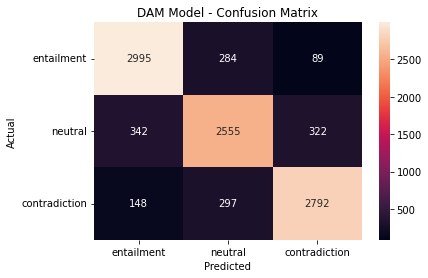

In [68]:
for model_name, preds in predictions.items():
    index_preds = preds[1]
    
    cm = metrics.confusion_matrix(test_labels, index_preds)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=True)
    ax.set(xlabel="Predicted", ylabel="Actual", xticklabels=label_classes, yticklabels=label_classes, title=model_name+" - Confusion Matrix")
    plt.yticks(rotation=0)

NAIVE BAYES CLASSIFIER

In [105]:
print("Classification report")
print(classification_report(Y_val, pred2))

Classification report
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      3329
           1       0.64      0.62      0.63      3235
           2       0.63      0.63      0.63      3278

    accuracy                           0.63      9842
   macro avg       0.63      0.63      0.63      9842
weighted avg       0.63      0.63      0.63      9842



Text(0.5, 1.0, 'NB Confusion matrix')

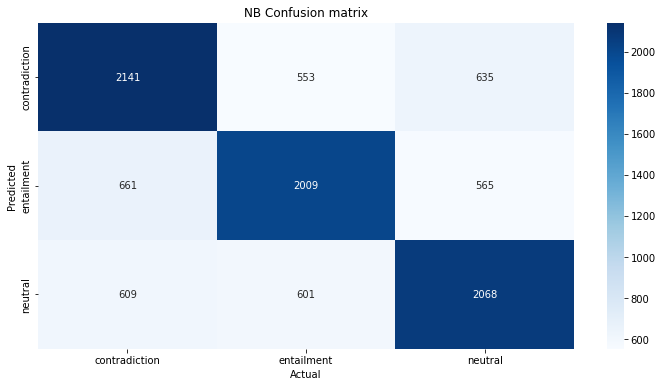

In [73]:
aux_df = tr_df[['gold_label', 'label_index']].drop_duplicates().sort_values('gold_label')
conf_matrix = confusion_matrix(Y_val, pred2)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['gold_label'].values, 
            yticklabels=aux_df['gold_label'].values,
            cmap="Blues", 
            fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('NB Confusion matrix')

LOGISTIC REGRESSION

In [107]:
print("Classification report")
print(classification_report(Y_val, pred))

Classification report
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      3329
           1       0.63      0.62      0.63      3235
           2       0.63      0.62      0.62      3278

    accuracy                           0.63      9842
   macro avg       0.63      0.63      0.63      9842
weighted avg       0.63      0.63      0.63      9842



Text(0.5, 1.0, ' LG Confusion matrix')

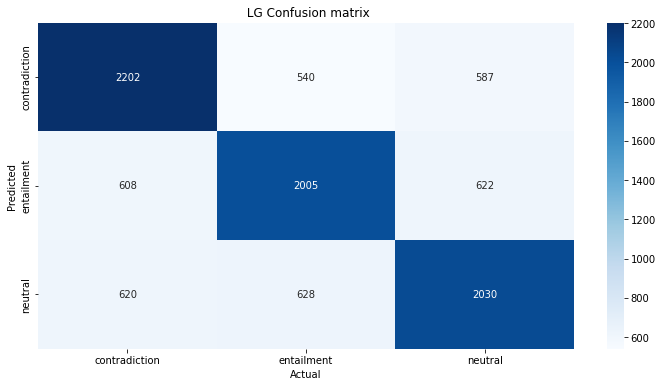

In [74]:
aux_df = tr_df[['gold_label', 'label_index']].drop_duplicates().sort_values('gold_label')
conf_matrix = confusion_matrix(Y_val, pred)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['gold_label'].values, 
            yticklabels=aux_df['gold_label'].values,
            cmap="Blues", 
            fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title(' LG Confusion matrix')